# Introduction to neural network classification with TensorFlow

In this notebook we are goihng to learn how to write neural network for classification problems.


## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 100 examples

n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand , let's visualize it.

In [ ]:
import pandas as pd
circles = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'label': y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


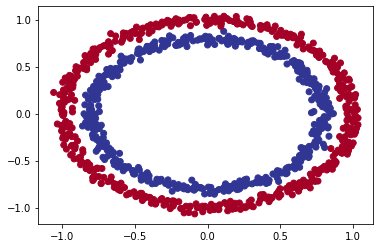

In [ ]:
# Visulaize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output shapes 

In [ ]:
# Check the shapes of our feathures and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples wer are working with
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

1. Create or import a model
2. compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate..

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)


model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
# Let's try improve our model by taining for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we are working on a binary classification problem and our model is getting aroound 50% accuracy... it's performing as its' gussing so let's stop things up a noth and addd an extra layer

In [ ]:
# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)                               
])

# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
           optimizer=tf.keras.optimizers.SGD(),
           metrics=['accuracy'])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934733390808105, 0.5]

In [ ]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

1. Create the model - we might to add more layers or increase the number of hiddenl laysers.
2. Compile the model - here we might want to choose a different optimization function such as Adam instead of SGD.
3. Fit the model - perhaps we might fit our model for more epochs.

In [ ]:
# 1. Create the model(this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10),  # add another layer with 10 neurons
  tf.keras.layers.Dense(1)                               
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3 Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7019 - accuracy: 0.5100


[0.7019345760345459, 0.5099999904632568]

To visualize our model's predictions , let's create a function `plot_decision_boundary()`, this funciton

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the 

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  # Define the axis boudnaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

  # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


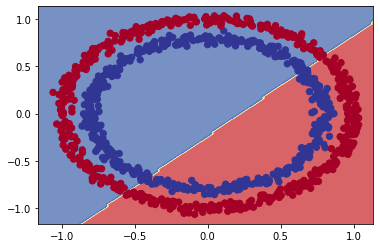

In [ ]:
plot_decision_boundary(model=model_3, 
                       X=X,
                       y=y)

In [ ]:
# Let's see if your model can be used for a regression problem...

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

oh wait... we compiled our model for a binary classification problem.

but... we are now working with on a regression problem, let's change the model to suit our data.

In [ ]:
tf.random.set_seed(42)

In [ ]:
# tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                               
])

# Compile the model, this time for regression
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_3.fit(X_reg_train, y_reg_train, epochs=100)

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend();

In [ ]:
# Set the random seet
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)                               
])
# 2. Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

In [ ]:
# Check out  our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Check the decisoin boundary for our lates model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try build our frist neural network with non-linear activation

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)                               
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

In [ ]:
# Time to replicate the multilayer neural network from TensorFlow playground
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1)                               


])

# 2. compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=250)

In [ ]:
# Evaluate the model
model_6.evaluate(X, y)

In [ ]:
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

In [ ]:
# 4. Evaluate the model
model_7.evaluate(X, y)

In [ ]:
# Let's vizualize our incredible metrics
plot_decision_boundary(model=model_7, X=X, y=y)

**Quetions:** What's wrong with the prediction we have made? Are we really evaluating our model correctly? Hint: what data the model learn on and what data did we predict on?

**Note** The combination of **linear** and **non-linear** function is one the key fundamentals of neural networks.

In [ ]:
 # Create a toy tensor (similar to the data we pass into our models)
 A = tf.cast(tf.range(-10, 10), tf.float32)

In [ ]:
A

In [ ]:
plt.plot(A)

In [ ]:
# Let's start by replication sigmoid function
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)  

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)  

In [ ]:
plt.plot(relu(A));

In [ ]:
plt.plot(A)

In [ ]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

In [ ]:
plt.plot(tf.keras.activations.linear(A))

## Evaluating and Improving our classification

So far we have been training and testing on the same dataset...
However, in machine learning this is bascially a sin, So let's create a training and test set.


In [ ]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# Let's 

tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')                              
])

# 2. compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])

# 3. Fit the model
history = model_8.fit(X, y, epochs=25)

In [ ]:
# Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

## Plot the loss or (training) curves

In [ ]:
pd.DataFrame(history.history)

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves');

**Note:** For many problem sthe loss funciton doing dow means the model is improving (the prediction it's making are getting better.)

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decrease the most during training) we are going to use the following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to you

In [ ]:
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_9.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_9 = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel='epochs');

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/ 20))
lrs

In [ ]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Leraning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')
plt.show()

In [ ]:
# Example of other typical learning rates values:
10 **0, 10**-1, 10**-2, 10**-3, 1e-4

In [ ]:
 tf.random.set_seed(42)

 model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),                                  
  tf.keras.layers.Dense(1, activation='sigmoid')
 ])

 # Compile the model with the ideal learning rate
 model_10.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(lr=0.02),
                  metrics=['accuracy'])
 
 # Fit the model
 history_10 = model_10.fit(X_train, y_train, epochs=20)

In [ ]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

In [ ]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

In [ ]:
# Plot the decision boundaries on training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful o fother classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Pricision
* Recall
* F1-socre
* Confusion matrix
* Classification report(from scikit-learn)

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {accuracy}')

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = model_10.predict(X_test)
y_pred = [0 if x < 0.5 else 1 for x in y_pred]

# Create confusion matrix
confusion_matrix(y_test, y_pred)

In [ ]:
# Conver prediction probabilities to binary format and view the first 10
tf.round(y_pred)[:10]

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_pred))

In [ ]:
# Note: the confusion matrix code we are about to write is a remix of aklearn + plot_confusion_matrix
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normilize confuion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])


# Label the axis
ax.set(title='Confusion Matrix',
       xlabel='Predicted Lable',
       ylabel='True Label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)  

ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set 
threshold = (cm.max() + cm.min()) / 2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]* 100:.1f}%)',
           horizontalalignment='center',
           color='white' if cm[i, j] > threshold else 'black',
           size=15)

## Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as multi-clas classification.
* This means if you have 3 different classes, it's multiclasification.
* it also means if you 100 different classes, it's multi-class classification.


To practice multi-class classification we are going to build a neural network to classifiy images of different items of clothings.


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
print(f'Training sample: \n{train_data[0]}\n')
print(f'Training label: \n{train_labels[0]}')

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

In [ ]:
plt.imshow(train_data[7]);

In [ ]:
train_labels[7]

In [ ]:
# Create a small list so we can index into our training labels so they are human-readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
len(class_names)

In [ ]:
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Buillding a multi-class classification model

For our muilti-class classificaition model, we can use a similar architecture to our binary classifier, however, we are going to have to tweat a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss Function = tf.keras.losses.CategoricalCrossentropy()
   * If you labels are one-hot encoded, use CategoricalCrossentropy()
   otherwise use SparceCategoricalCrossentropy()
* Outut layer activation = Softmax(not sigmoid)



In [ ]:
tf.random.set_seed(42)


model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),                              
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),                                
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),                  
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

In [ ]:
# Check the model summary
model_11.summary()

In [ ]:
# Check the mean and max values of the training data
train_data.min(), train_data.max()

Neural networks prefer data to be scaled (or normalized), this means they like to have number in the tensors they try to find patterns in between 0 and 1

In [ ]:
# We can get our taining and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check teh min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

In [ ]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),                                
  tf.keras.layers.Dense(10, activation='softmax')                              
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

In [ ]:
# Plot non-normalize data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')

pd.DataFrame(norm_history.history).plot(title='Normalized data')

**Note:** The same model with even *slightly* different data can produce dramatically different results. So when you are comparing models, it's important to make sure you are comparing them on the same criteria (e.g. same architecture but different but different data or same data but different architecture)

## Finding the ideal learning rate

In [ ]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),                                
  tf.keras.layers.Dense(4, activation='relu'),                                
  tf.keras.layers.Dense(10, activation='softmax')
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch / 20))

find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])


In [ ]:
lrs = 1e-3 * (10 ** (tf.range(40)/20))


In [ ]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),                               
  tf.keras.layers.Dense(10, activation='softmax'),                               
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=['accuracy'])

history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

In [ ]:
# Note: the confusion matrix code we are about to write is a remix of aklearn + plot_confusion_matrix
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normilize confuion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])


  # Label the axis
  ax.set(title='Confusion Matrix',
        xlabel='Predicted Lable',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)  

  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set 
  threshold = (cm.max() + cm.min()) / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]* 100:.1f}%)',
            horizontalalignment='center',
            color='white' if cm[i, j] > threshold else 'black',
            size=text_size)

In [ ]:
class_names

In [ ]:
y_probs = model_14.predict(test_data_norm)

y_probs[:5]

**Note:** Remember to make predictions on the same kind of data your model was trained on.

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

In [ ]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

In [ ]:
test_labels

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
y_pred=y_preds)

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

**Note** Often when working with images and aother forms of vizual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label and the predicted label.

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):

  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label), color=color)    

In [ ]:
# Check out a random image as well as it's prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [ ]:
# Find the layers of our ost recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

In [ ]:
model_14.summary()

Now lets's check out the bias vector...

In [ ]:
biases, biases.shape

Every neuron has a bias vector, Each of these is paired with a weights matrix.

The bias vector get initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the pattern within the corresponding weight matrix should influence the next layer.


In [ ]:
model_14.summary()

In [ ]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)

# Next : Check out exercises and extra curriculum...